## Assignment 4
## Girish Kumar
## N160485

# Image Enhancing Techniques
<br/>
code based on this reference pic <br/>

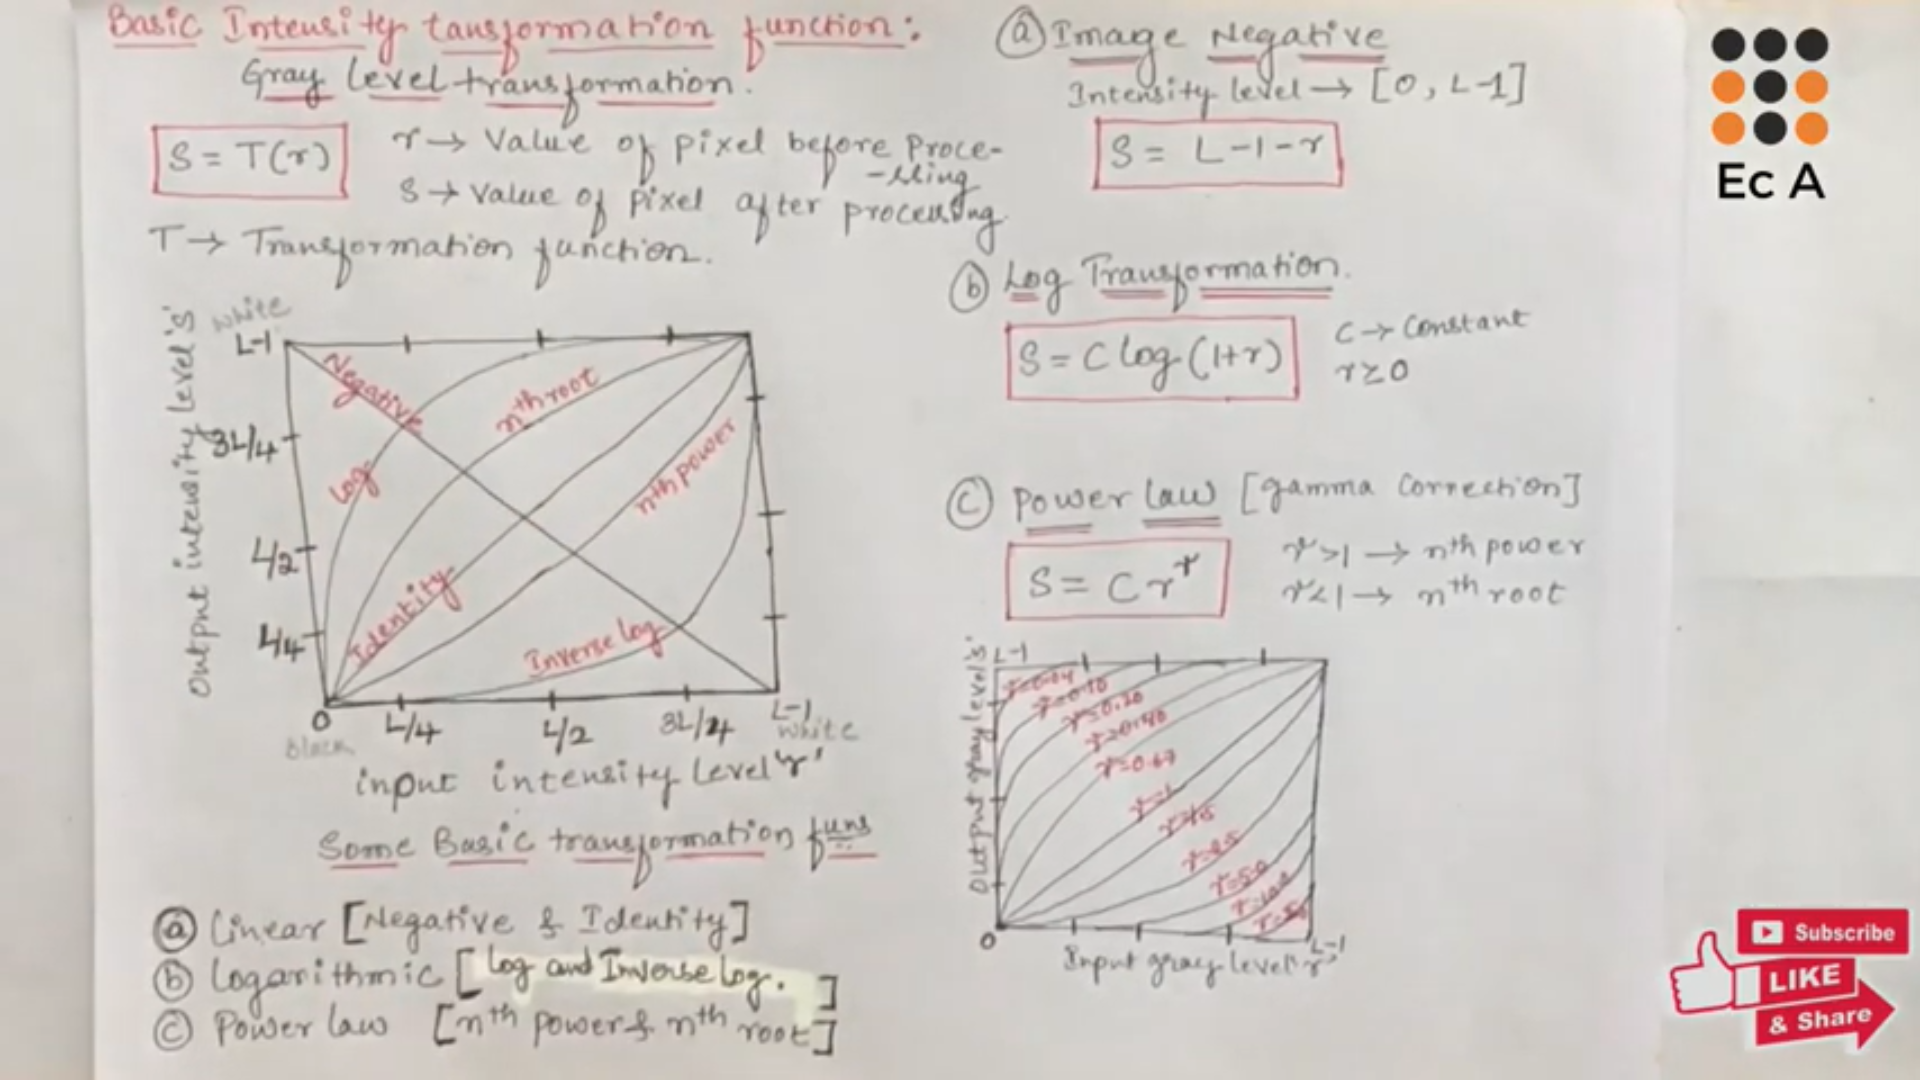


In [18]:
import pandas as pd
import numpy as np

import cv2 as cv

In [19]:
import matplotlib.pyplot as plt

### <b>  Negative Transformation :</b>
Image negative is produced by subtracting each pixel from the maximum intensity value. e.g. for an 8-bit image, the max intensity value is 2^8– 1 = 255, thus each pixel is subtracted from 255 to produce the output image.
<br/><br/>
   Formula s = T(r) = L – 1 – r
   where,<br/>
    
     s is the output pixel
     r is the input pixel
    Here, L is the  2^8 
    
    
    

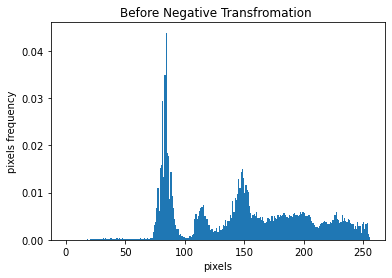

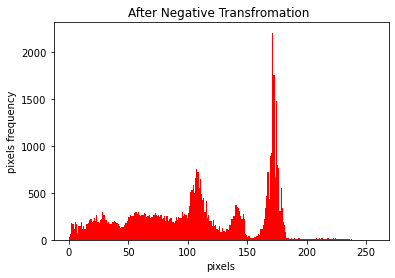

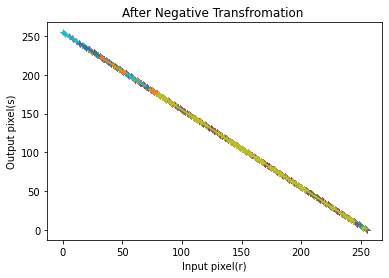

In [20]:
# Negative Transfromation 


#normal understanding of python code

#just image it is an image 5*5 just simple understanding
img = cv.imread("temp.jpg",0)

#original image histogram 
cv.imshow("original_img",img)
plt.title("Before Negative Transfromation ")
plt.xlabel('pixels')
plt.ylabel("pixels frequency")
plt.hist(img.ravel(),256,[0,256],"Green")
plt.show()

#after negative Transformation
#every pixel is substracted from 255 here maximum grey level is 255 right so 
#numpy array provide this facility to make in a simple line 
negative_img = 255-img

cv.imshow("negative_img",negative_img)
plt.title("After Negative Transfromation ")
plt.xlabel('pixels')
plt.ylabel("pixels frequency")

plt.hist(negative_img.ravel(),256,[0,256],color="red")
plt.show()
plt.title("After Negative Transfromation ")
plt.xlabel('Input pixel(r)')
plt.ylabel("Output pixel(s)")

plt.plot(img,negative_img,marker="+")
cv.waitKey(0)
cv.destroyAllWindows()

### Logarithmic Transformation <br/>
 formula:
 <b> s=c*log(1+r)</b>
 <br/>
 where, <br/>
 * s is the output pixel 
 * c is the constant (scaling factor)
 * r (r >=0) is the input pixel 
 
 here we can compress the gray level or expand the gray level .By using this transformation we get either high contrast image or low contrast image
 

 <br/>
   we use log(1+r) because log(0) is infinity ..


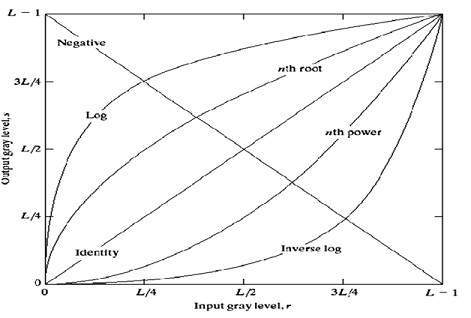


<ipython-input-21-d7c5ad7527f8>:10: RuntimeWarning: divide by zero encountered in log
  new_img = c * (np.log(img + 1))


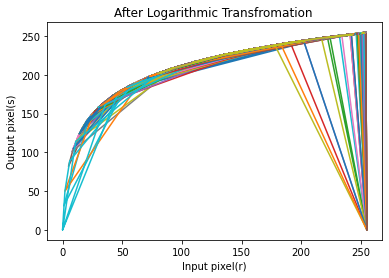

In [21]:
#Logarithmic Transformation

img = cv.imread("temp.jpg",0)


#c value is based on this method as per the reference material
c = 255 / np.log(1 + np.max(img))

#try with different c value you still get an image 
new_img = c * (np.log(img + 1))
log_image = np.array(new_img, dtype = np.uint8)
cv.imshow('log Transformation',log_image)




plt.title("After Logarithmic Transfromation ")
plt.xlabel('Input pixel(r)')
plt.ylabel("Output pixel(s)")
plt.plot(img,log_image)
cv.waitKey(0)
cv.destroyAllWindows()

### Power-law Transformation

Formula s=c*r<sup> γ </sup> 
* s is the output pixel value 
* r is the input pixel value
* γ is the Gamma value
    * if gamma value is gamma(γ) > 1 we get the darker image and if the gamma(γ)< 1 the intensity increases we get lighter image.

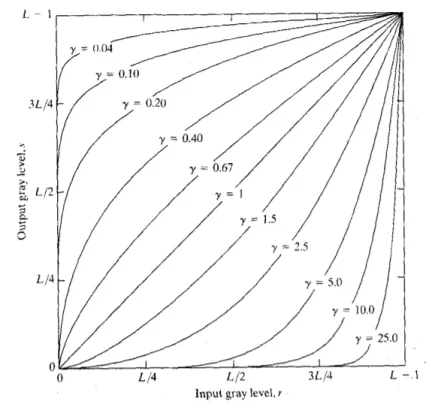


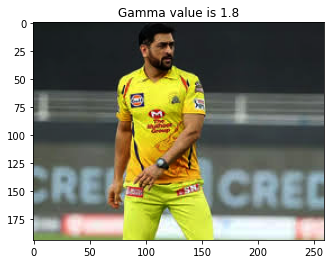

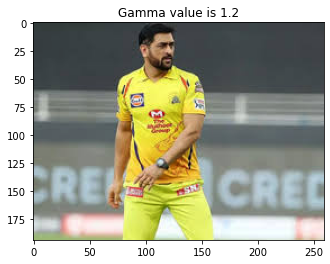

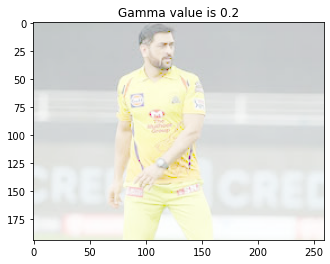

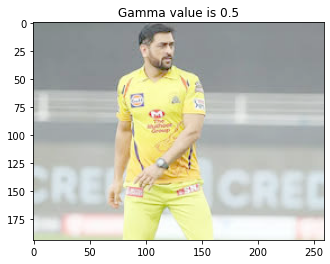

In [22]:
# Power-law Transformation

%matplotlib inline
img = cv.imread("temp.jpg")
gamma = 1
transformed_img = np.array(255*(img/255)**gamma,dtype=np.uint8)
cv.imshow("transformed_img",transformed_img)
cv.waitKey(0)
cv.destroyAllWindows()

gammalist = [1.8,1.2,0.2,0.5]

for i in gammalist:
    
    transformed_img = np.array(255*(img/255)**i,dtype=np.uint8)
    plt.title("Gamma value is "+str(i))
    plt.imshow(cv.cvtColor(transformed_img, cv.COLOR_BGR2RGB))
    plt.show()
   
#plt.imshow(transformed_img,cmap="Greys", interpolation="None")






# Gray level Slicing

* I know there are two types of gray level slicing
    * Without Background 
    * With Background
    
In simple words without background means just make the pixels you don't want with in the range of threshold make them zero . wanted pixels are turn to max intensity. with background means unwanted pixels are remain same and wanted pixels are will be max intensity of image
    

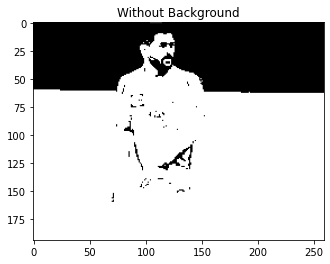

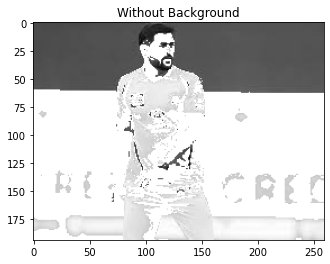

In [45]:
#without Background
img = cv.imread("temp.jpg",0)

#i want pixels in the range of 100-150 so remaining pixels are became zero in without backgroud

range1=100
range2=255



for row in range(len(img)):
   
    for pixel in range(len(img[row])):
        
        if(img[row][pixel] >=range1 and img[row][pixel]<=range2):
            img[row][pixel]=255
        else:
            img[row][pixel]=0
       
new_img = np.array(img,dtype=np.uint8)
plt.title("Without Background")
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
plt.show()



#with Background
img = cv.imread("temp.jpg",0)

#i want pixels in the range of 100-150 so remaining pixels are became zero in without backgroud

range1=100
range2=200



for row in range(len(img)):
   
    for pixel in range(len(img[row])):
        
        if(img[row][pixel] >=range1 and img[row][pixel]<=range2):
            img[row][pixel]=255
        
       
new_img = np.array(img,dtype=np.uint8)
plt.title("Without Background")
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
plt.show()

        

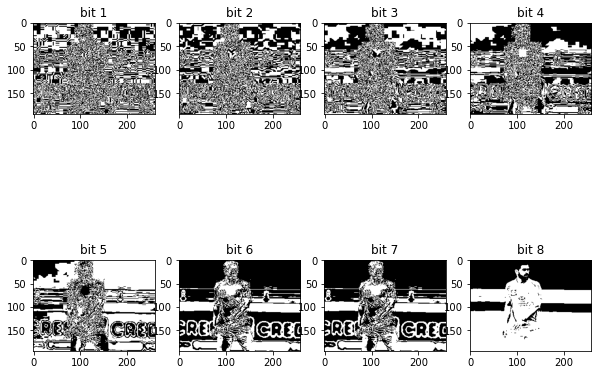

In [13]:
#bit slicing

img = cv.imread("temp.jpg",0)
#img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#plt.imshow(img)

b0 = img >> 0 & 1
b1 = img >> 1 & 1
b2 = img >> 2 & 1
b3 = img >> 3 & 1
b4 = img >> 4 & 1
b5 = img >> 5 & 1
b6 = img >> 6 & 1
b7 = img >> 7 & 1

plt.subplots(figsize=(10,8))


plt.subplot(2,4,1)
plt.imshow(b0,cmap='gray')
plt.title('bit 1')

plt.subplot(2,4,2)
plt.imshow(b1,cmap='gray')
plt.title('bit 2')


plt.subplot(2,4,3)
plt.imshow(b2,cmap='gray')
plt.title('bit 3')

plt.subplot(2,4,4)
plt.imshow(b3,cmap='gray')
plt.title('bit 4')

plt.subplot(2,4,5)
plt.imshow(b4,cmap='gray')
plt.title('bit 5')


plt.subplot(2,4,6)
plt.imshow(b5,cmap='gray')
plt.title('bit 6')

plt.subplot(2,4,7)
plt.imshow(b5,cmap='gray')
plt.title('bit 7')

plt.subplot(2,4,8)
plt.imshow(b7,cmap='gray')
plt.title('bit 8')
plt.show()


In [4]:
#Simple code

import cv2
import numpy as np 
lena = cv2.imread("temp.jpg",0)
cv2.imshow("lena",lena)
r,c = lena.shape
x = np.zeros((r,c,8),dtype=np.uint8)
for i in range(8):
    x[:,:,i] = 2**i
r = np.zeros((r,c,8),dtype=np.uint8)
for i in range(8):
    r[:,:,i] = cv2.bitwise_and(lena,x[:,:,i])
    mask=r[:,:,i]>0
    r[mask]=255
    cv2.imshow(str(i),r[:,:,i])
cv2.waitKey()
cv2.destroyAllWindows()